Census Income Data Set

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:
>50K, <=50K.

age: continuous
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked 
fnlwgt: continuous
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
education-num: continuous
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male
capital-gain: continuous
capital-loss: continuous
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset


In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Loading the Dataset
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv('Census_income_dataset.csv', sep="\s*,", header = None, names = names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
# Check the dataset shape
df.shape

(15355, 15)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15355 entries, 0 to 15354
Data columns (total 15 columns):
age               15355 non-null int64
workclass         15355 non-null object
fnlwgt            15355 non-null int64
education         15355 non-null object
education-num     15355 non-null int64
marital-status    15355 non-null object
occupation        15355 non-null object
relationship      15355 non-null object
race              15355 non-null object
sex               15355 non-null object
capital-gain      15355 non-null int64
capital-loss      15355 non-null int64
hours-per-week    15355 non-null int64
native-country    15354 non-null object
income            15354 non-null object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


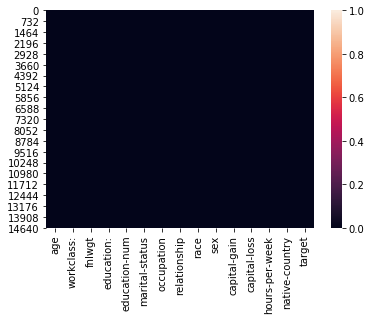

In [12]:
# checking for missing values by plotting a heat map
sns.heatmap(df.isnull())
plt.show()

based on the above info, there is no missing data.
Now let us describe the data and check the statistics

In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15355.000000,1.535500e+04,15355.000000,15355.000000,15355.000000,15355.000000
mean,38.503224,1.901280e+05,10.087398,1058.312016,86.855226,40.450407
std,13.642695,1.053208e+05,2.558126,7290.677935,400.329944,12.290445
min,17.000000,1.921400e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.184380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.788150e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379430e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# box plot for the numerical features before standardization

In [ ]:
Based on the summary description, we will need to standardize our features 

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [22]:
df['workclass'].value_counts()

 Private             10690
 Self-emp-not-inc     1207
 Local-gov             968
 ?                     865
 State-gov             630
 Self-emp-inc          534
 Federal-gov           456
 Never-worked            3
 Without-pay             2
Name: workclass, dtype: int64

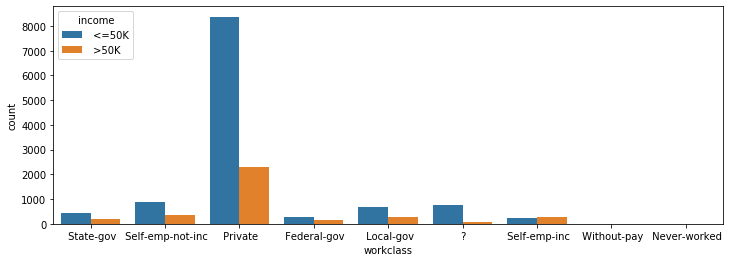

In [28]:
fig=plt.figure(figsize=(12,4))
sns.countplot(x='workclass', hue='income', data =df)
plt.show()

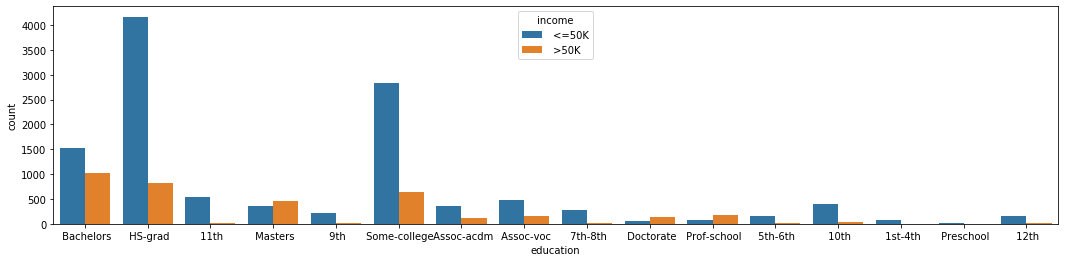

In [34]:
fig=plt.figure(figsize=(18,4))
sns.countplot(x='education', hue='income', data =df)
plt.show()

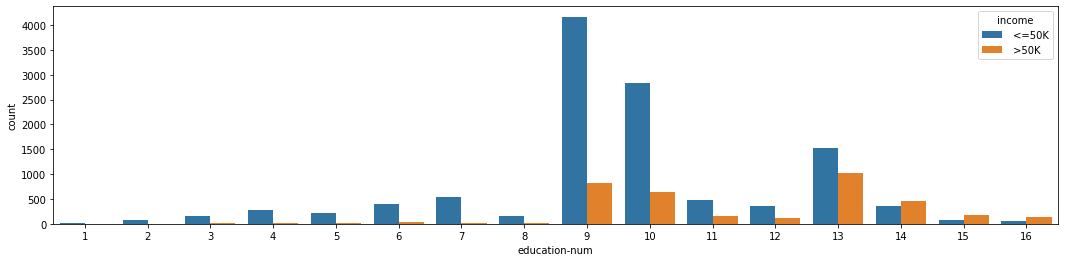

In [37]:
fig=plt.figure(figsize=(18,4))
sns.countplot(x='education-num', hue='income', data =df)
plt.show()

In [35]:
df['sex'].value_counts()

 Male      10278
 Female     5077
Name: sex, dtype: int64

In [36]:
df['education-num'].value_counts()

9     4989
10    3472
13    2550
14     821
11     641
7      557
12     483
6      438
4      297
15     255
5      229
16     191
8      173
3      159
2       78
1       22
Name: education-num, dtype: int64

In [49]:
df['marital-status'].value_counts()

 Married-civ-spouse       7054
 Never-married            5058
 Divorced                 2099
 Separated                 481
 Widowed                   455
 Married-spouse-absent     197
 Married-AF-spouse          11
Name: marital-status, dtype: int64

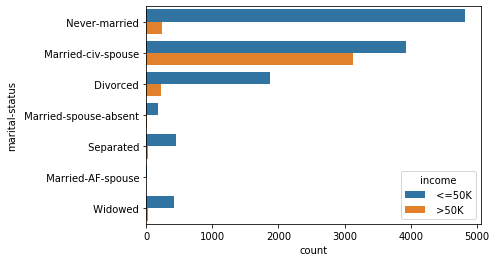

In [55]:
sns.countplot(y='marital-status', hue='income', data=df)
plt.show()

In [50]:
df['relationship'].value_counts()

 Husband           6190
 Not-in-family     3935
 Own-child         2402
 Unmarried         1614
 Wife               766
 Other-relative     448
Name: relationship, dtype: int64

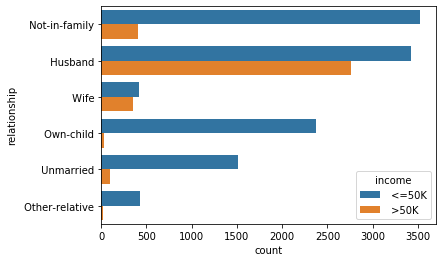

In [54]:
sns.countplot(y='relationship', hue='income', data=df)
plt.show()

In [52]:
df['race'].value_counts()

 White                 13163
 Black                  1454
 Asian-Pac-Islander      482
 Amer-Indian-Eskimo      139
 Other                   117
Name: race, dtype: int64

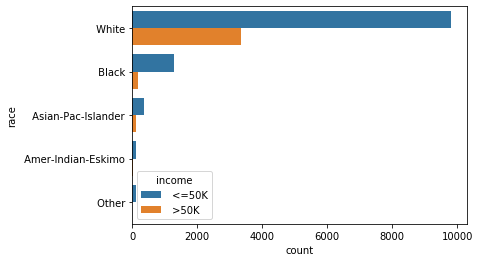

In [53]:
sns.countplot(y='race', hue='income', data=df)
plt.show()

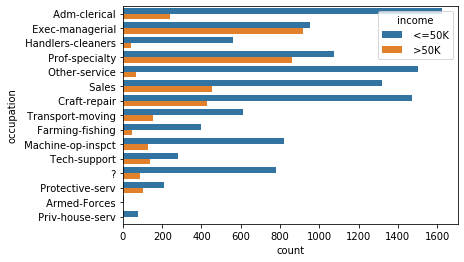

In [16]:
sns.countplot(y='occupation', hue='income', data=df)
plt.show()

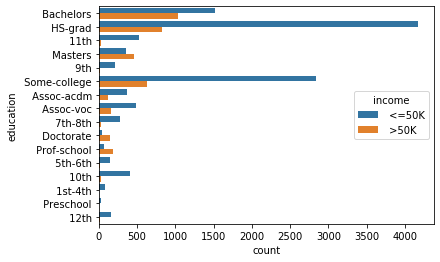

In [19]:
sns.countplot(y='education', hue='income', data=df)
plt.show()

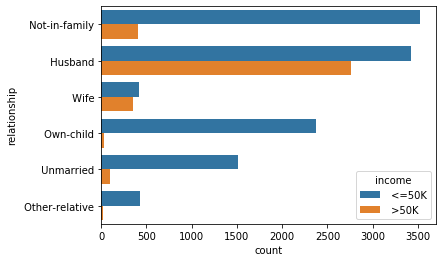

In [20]:
sns.countplot(y='relationship', hue='income', data=df)
plt.show()

# Data Cleaning and Transformation

Based on our EDA, it is required of us to encode our data to numerical forms and transform certain features 

In [81]:
# converting datatypes of country and income column to object
# 'native-country','income'
df['native-country'] = df['native-country'].astype('str')
df['income'] = df['income'].astype('str')

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for feature in df.columns:
    if df[feature].dtypes == 'object':
         df[feature]=labelencoder.fit_transform(df[feature])

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,38,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,38,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


Also, as we have seen with the descriptive statistics, the numerical features need to be standardized 

In [89]:
# Feature Scaling  for standardization of numerical features 
from sklearn.preprocessing import StandardScaler

numeric_features = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']
sc = StandardScaler()

for feature in numeric_features:
    df[feature] = sc.fit_transform(df[[feature]])

In [90]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.036415,7,-1.069264,9,13,4,1,1,4,1,0.153034,-0.216966,-0.036648,38,0
1,0.842733,6,-1.014239,9,13,2,4,0,4,1,-0.145164,-0.216966,-2.233548,38,0
2,-0.036887,4,0.242296,11,9,0,6,1,4,1,-0.145164,-0.216966,-0.036648,38,0
3,1.062638,4,0.423415,1,7,2,6,0,2,1,-0.145164,-0.216966,-0.036648,38,0
4,-0.769904,4,1.407944,9,13,2,10,5,2,0,-0.145164,-0.216966,-0.036648,5,0


In [91]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,1.535500e+04,15355.000000,1.535500e+04,15355.000000,15355.000000,15355.000000,15355.000000,15355.000000,15355.000000,15355.000000,1.535500e+04,1.535500e+04,1.535500e+04,15355.000000,15355.000000
mean,-1.631749e-16,3.874894,-1.269508e-16,10.333312,10.087398,2.610029,6.576229,1.453794,3.672615,0.669359,2.726102e-16,-1.582991e-15,6.509356e-16,35.745034,0.239075
std,1.000033e+00,1.458082,1.000033e+00,3.851230,2.558126,1.503997,4.252772,1.611352,0.840599,0.470459,1.000033e+00,1.000033e+00,1.000033e+00,7.658868,0.426685
min,-1.576223e+00,0.000000,-1.622848e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.451643e-01,-2.169662e-01,-3.209948e+00,0.000000,0.000000
25%,-7.699040e-01,4.000000,-6.807047e-01,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,-1.451643e-01,-2.169662e-01,-3.664812e-02,38.000000,0.000000
50%,-1.101888e-01,4.000000,-1.074184e-01,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,-1.451643e-01,-2.169662e-01,-3.664812e-02,38.000000,0.000000
75%,6.228280e-01,4.000000,4.540084e-01,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,-1.451643e-01,-2.169662e-01,3.701852e-01,38.000000,0.000000
max,3.774801e+00,8.000000,1.229215e+01,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.357129e+01,1.066441e+01,4.763985e+00,41.000000,2.000000


In [ ]:
# box plot for the numerical features before standardization

In [92]:
# Let us make a Dependent and independent variable set
X = df.iloc[:, 0:-1].values
y = df.iloc[:, 14].values

In [93]:
print(X.shape)
print(y.shape)

(15355, 14)
(15355,)


In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc

In [97]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
SVC=SVC()
DT=DecisionTreeClassifier(random_state=8)
GNB=GaussianNB()

In [98]:
models = []
models.append(('LogisticRegression', LR))
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SVC))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

In [99]:
Model = []
F1_score=[]
Accuracy_score=[]
Precision_score=[]
CVS = []
rocscore = []
for name, model in models:
    Model.append(name)
    ml=model
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    F1_score.append(f1_score(y_test,pred))
    Accuracy_score.append(accuracy_score(y_test,pred)*100)
    Precision_score.append(precision_score(y_test,pred)*100)
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    CVS.append(sc*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    rocscore.append(roc_auc*100)

In [100]:
resultset=pd.DataFrame({'Model':Model,
                        'F1_score':F1_score,
                        'Accuracy_score': Accuracy_score, 
                        'Precision Score': Precision_score,
                        'Cross_Val_Score': CVS,
                        'ROC_Score':rocscore
                       })
resultset

,Model,F1_score,Accuracy_score,Precision Score,Cross_Val_Score,ROC_Score
0,LogisticRegression,0.523891,81.830023,72.576832,82.351186,67.996145
1,KNeighborsClassifier,0.592434,81.406708,63.650307,81.745446,72.600246
2,SVC,0.585045,83.555845,76.068376,83.725432,71.353306
3,DecisionTreeClassifier,0.594987,80.006513,58.800522,80.436462,73.302330
4,GaussianNB,0.455285,80.364702,70.391061,80.612307,64.539915


In [101]:
# Serialization of the model
import joblib
joblib.dump(SVC,'census_income_model.obj')

['census_income_model.obj']

In [102]:
model=joblib.load('census_income_model.obj')

In [103]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])